# <font color='salmon'> Importing the Libraries

In [2]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np # linear algebra
import pandas as pd# data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt
import seaborn as sns
import missingno as msno

from subprocess import check_output
from tqdm.notebook import tqdm
import plotly.graph_objs as go
import plotly.offline as py
import datetime
from sort_dataframeby_monthorweek import *
import calendar
import os
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

#For statistical tests
import scipy.stats as st

#For formula notation (similar to R)
import statsmodels.formula.api as smf

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import xgboost as xgb

### Memory Functions

# <font color='salmon'> Data

In [3]:
df_train = df = pd.read_csv(
    '44_item', 
    parse_dates=["date"], low_memory = False)


# <font color='salmon'> EDA of the Dataset

Reading Train File

In [4]:
df_train.head()

Unnamed: 0       date  store_nbr  item_nbr  onpromotion        family  \
0           0 2013-01-02         44    265559          0.0     GROCERY I   
1           1 2013-01-02         44    314384          0.0     GROCERY I   
2           2 2013-01-02         44    364606          0.0     GROCERY I   
3           3 2013-01-02         44    502331          0.0  BREAD/BAKERY   
4           4 2013-01-02         44    559870          0.0     GROCERY I   

   class  perishable  dcoilwtico  transactions  unit_sales  
0   1072           0      93.125        4820.0       207.0  
1   1004           0      93.125        4820.0       135.0  
2   1014           0      93.125        4820.0       244.0  
3   2702           1      93.125        4820.0       163.0  
4   1072           0      93.125        4820.0       230.0

In [5]:
def resumetable(df):
    print(f"Dataset Shape: {df.shape}")
    summary = pd.DataFrame(df.dtypes,columns=['dtypes'])
    summary = summary.reset_index()
    summary['Name'] = summary['index']
    summary = summary[['Name','dtypes']]
    summary['Missing'] = df.isnull().sum().values
    summary['Missing(% of Total values)']= (100 * summary['Missing']) / df.shape[0]
    summary['Uniques'] = df.nunique().values
    summary['First Value'] = df.loc[0].values
    summary['Second Value'] = df.loc[1].values
    return summary

In [6]:
resumetable(df_train)

Dataset Shape: (11741, 11)


Name          dtypes  Missing  Missing(% of Total values)  \
0     Unnamed: 0           int64        0                         0.0   
1           date  datetime64[ns]        0                         0.0   
2      store_nbr           int64        0                         0.0   
3       item_nbr           int64        0                         0.0   
4    onpromotion         float64        0                         0.0   
5         family          object        0                         0.0   
6          class           int64        0                         0.0   
7     perishable           int64        0                         0.0   
8     dcoilwtico         float64        0                         0.0   
9   transactions         float64        0                         0.0   
10    unit_sales         float64        0                         0.0   

    Uniques          First Value         Second Value  
0     11741                    0                    1  
1      1679  2013-01-02 00:00:00  2013-01-02 00:00:00  
2         1                   44                   44  
3         7               265559               314384  
4         2                  0.0                  0.0  
5         4            GROCERY I            GROCERY I  
6         6                 1072                 1004  
7         2                    0                    0  
8       704               93.125               93.125  
9       683               4820.0               4820.0  
10     1904                207.0                135.0

In [7]:
def describe(df):
    return df.describe().T
describe(df_train)[2:]

count           mean            std          min         25%  \
item_nbr      11741.0  519970.336513  243700.985131  265559.0000  314384.000   
onpromotion   11741.0       0.045396       0.208181       0.0000       0.000   
class         11741.0    1469.739886     662.930852    1004.0000    1014.000   
perishable    11741.0       0.285921       0.451871       0.0000       0.000   
dcoilwtico    11741.0      67.947738      25.679292      26.1875      46.375   
transactions  11741.0    4337.313346     729.331802    2332.0000    3810.000   
unit_sales    11741.0     150.858229     165.509932     -20.0000      67.000   

                       50%        75%          max  
item_nbr      502331.00000  584028.00  1047679.000  
onpromotion        0.00000       0.00        1.000  
class           1072.00000    2302.00     2702.000  
perishable         0.00000       1.00        1.000  
dcoilwtico        53.40625      95.75      110.625  
transactions    4168.00000    4784.00     8360.000  
unit_sales        92.00000     141.00     2112.000

In [8]:
# Group By store_nbr and Sum of unit_sales for each store_nbr
df = df_train.groupby(['store_nbr'], as_index=False).agg({'unit_sales':'sum'}).sort_values("unit_sales", ascending=False) 
df.head()

store_nbr    unit_sales
0         44  1.771226e+06

#### Unit sales of the Store

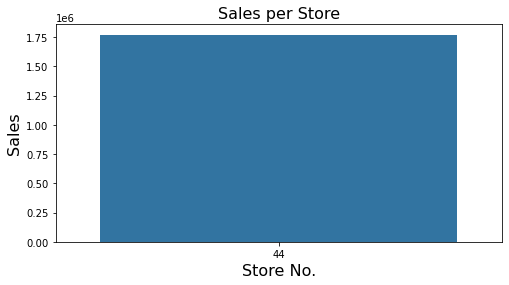

In [9]:
#PLotting store_nbr Vs unit_sales
fig, ax = plt.subplots()
fig.set_size_inches(8, 4)
ax = sns.barplot(x = df.store_nbr, y= "unit_sales", data = df, order= df.sort_values("unit_sales").store_nbr )
plt.title('Sales per Store',fontsize=16)
plt.ylabel('Sales',fontsize=16)
plt.xlabel('Store No.',fontsize=16)
plt.show()


#### Unit sales of Each Item

In [10]:
# Group By item_nbr and Sum of unit_sales for each item_nbr
x = df_train.groupby(['item_nbr'], as_index=False).agg({'unit_sales':'sum'})
x= x.sort_values('unit_sales', ascending=False)

In [11]:
 x['item_nbr'].unique()

array([1047679,  364606,  314384,  265559,  502331,  559870,  584028],
      dtype=int64)

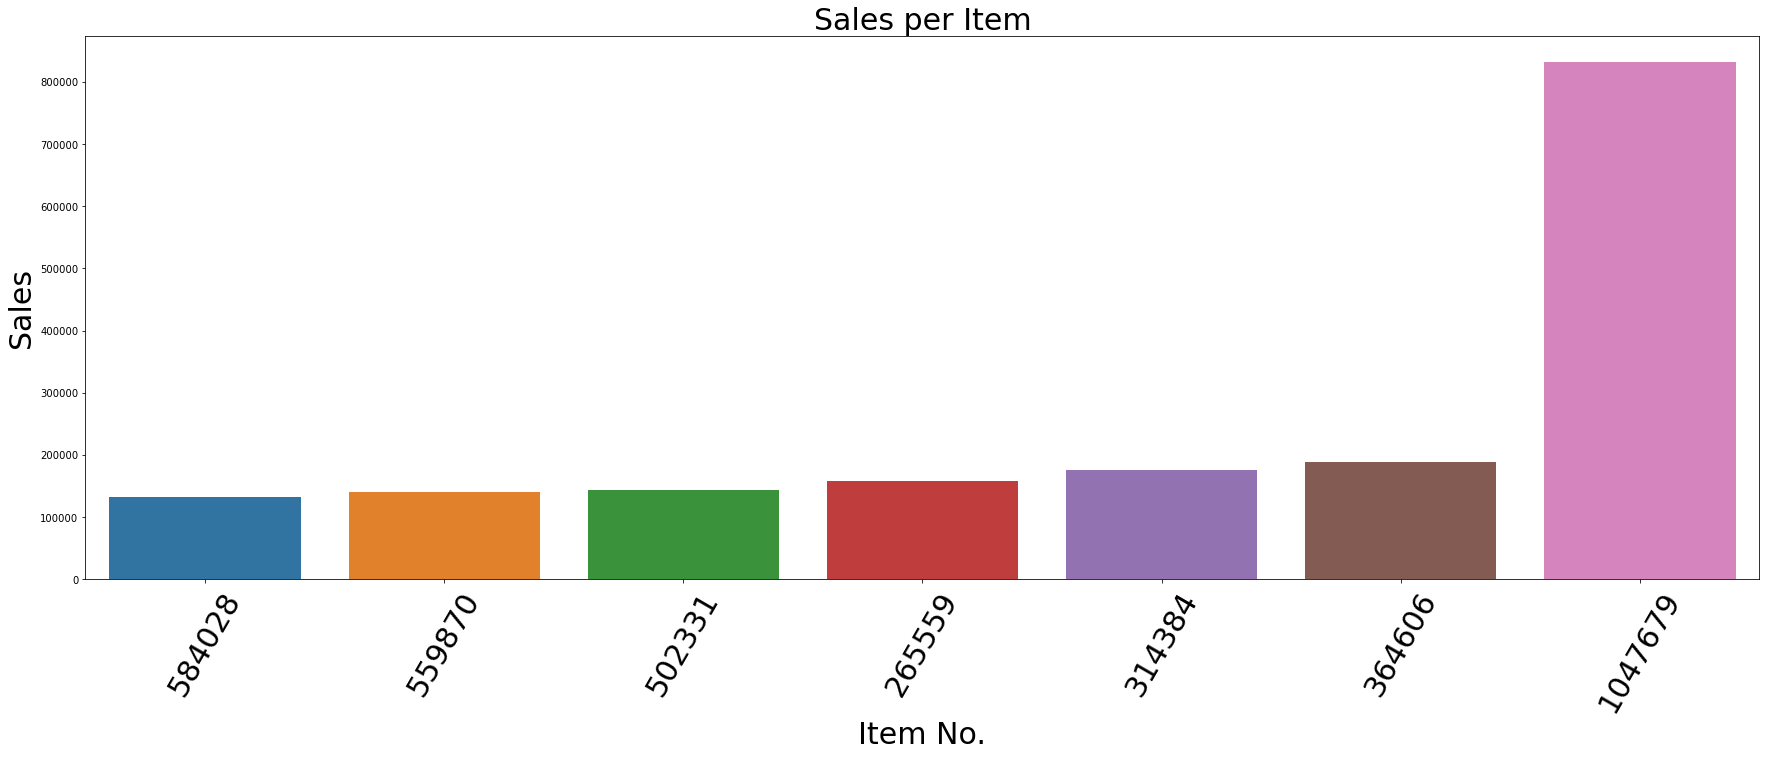

In [12]:
#Plotting item_nbr Vs unit_sales
fig, ax = plt.subplots()
fig.set_size_inches(30, 10)
ax = sns.barplot(x = x.item_nbr, y= "unit_sales", data = x, order= x.sort_values("unit_sales").item_nbr)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 60, fontsize = 30)
plt.title('Sales per Item',fontsize=30)
plt.ylabel('Sales',fontsize=30)
plt.xlabel('Item No.',fontsize=30)
plt.show()


## EDA on item no 502331

In [13]:
df_train = df_train[df_train["item_nbr"]==502331]

#### Sales per Year

In [14]:
# Adding Year as a Feature
df_train["year"]=df_train["date"].dt.year
df_train.head()

Unnamed: 0       date  store_nbr  item_nbr  onpromotion        family  \
3            3 2013-01-02         44    502331          0.0  BREAD/BAKERY   
10          10 2013-01-03         44    502331          0.0  BREAD/BAKERY   
17          17 2013-01-04         44    502331          0.0  BREAD/BAKERY   
24          24 2013-01-05         44    502331          0.0  BREAD/BAKERY   
31          31 2013-01-06         44    502331          0.0  BREAD/BAKERY   

    class  perishable  dcoilwtico  transactions  unit_sales  year  
3    2702           1      93.125        4820.0       163.0  2013  
10   2702           1      93.000        3618.0        87.0  2013  
17   2702           1      93.125        4168.0       100.0  2013  
24   2702           1      93.125        4920.0       137.0  2013  
31   2702           1      93.125        4924.0       203.0  2013

In [15]:
# Group By Year and Sum of unit_sales for each year
x = df_train.groupby(['year'], as_index=False).agg({'unit_sales':'sum'})
x.head()

year  unit_sales
0  2013     34595.0
1  2014     33228.0
2  2015     30771.0
3  2016     27368.0
4  2017     18330.0

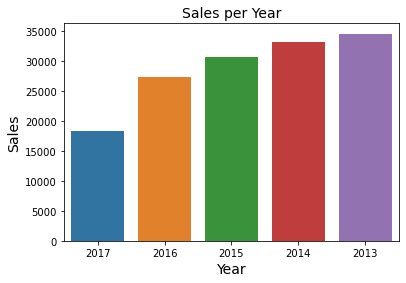

In [16]:
#Plotting year Vs unit_sales
sns.barplot(x = x["year"], y = 'unit_sales', data = x, order= x.sort_values("unit_sales").year)
plt.title('Sales per Year',fontsize=14)
plt.ylabel('Sales',fontsize=14)
plt.xlabel('Year',fontsize=14)
plt.show()

del x



*    Given Sales Data is from 2013 to 2017.
*   Sales are increasing each year except 2015 and 2017.



In [17]:
# Viewing Data only for 2017
df_train[df_train["date"].dt.year==2017].tail()

Unnamed: 0       date  store_nbr  item_nbr  onpromotion        family  \
11710       11710 2017-08-11         44    502331          0.0  BREAD/BAKERY   
11717       11717 2017-08-12         44    502331          0.0  BREAD/BAKERY   
11723       11723 2017-08-13         44    502331          0.0  BREAD/BAKERY   
11730       11730 2017-08-14         44    502331          0.0  BREAD/BAKERY   
11737       11737 2017-08-15         44    502331          0.0  BREAD/BAKERY   

       class  perishable  dcoilwtico  transactions  unit_sales  year  
11710   2702           1    48.81250        4416.0        83.0  2017  
11717   2702           1    48.81250        4276.0        82.0  2017  
11723   2702           1    48.81250        4392.0       109.0  2017  
11730   2702           1    47.59375        4040.0        82.0  2017  
11737   2702           1    47.56250        3816.0        65.0  2017


* The reason behind decrease in sales in 2017 is that 2017 only has records till 15th of August. 

#### Sales per Month for Every Year

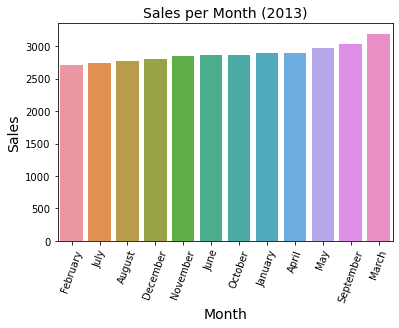

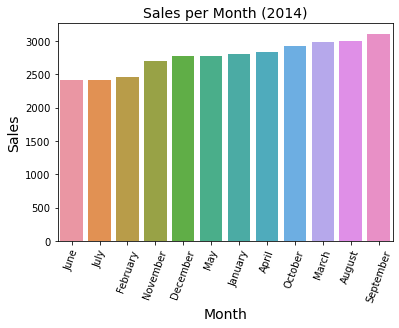

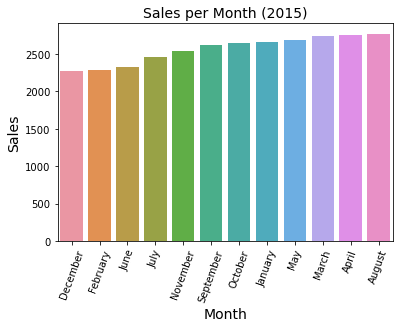

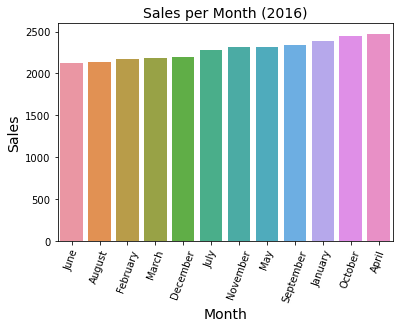

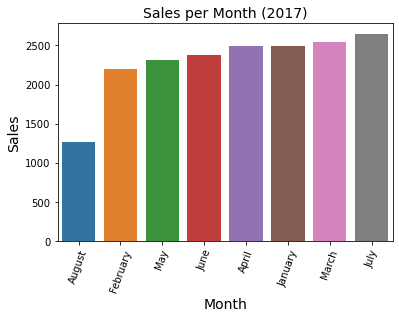

In [18]:
for year in df_train["date"].dt.year.unique():
    #Filtering data for specific year
    x = df_train[df_train["date"].dt.year == year]

    #Extracting month name from date
    x['month']=x['date'].dt.month_name()

    #Grouping data by months and adding unit_sales
    x=x.groupby(['month'], as_index=False).agg({'unit_sales':'sum'})
    
    #Sorting dataframe by Month
    x = Sort_Dataframeby_Month(df=x,monthcolumnname='month')

    #Plotting month Vs unit_sales for every year
    #plt.figure(figsize=(12,8))
    sns.barplot(x = x.month, y = 'unit_sales', data = x, order= x.sort_values("unit_sales").month)
    plt.xticks(rotation=70)
    plt.title("Sales per Month ("+str(year)+")",fontsize=14)
    plt.ylabel('Sales',fontsize=14)
    plt.xlabel('Month',fontsize=14)
    plt.show()
    del x

### Exploring weekly pattern if any:

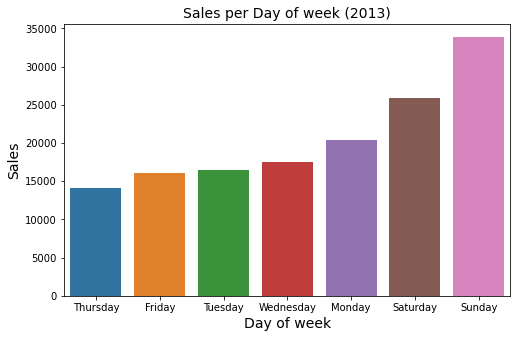

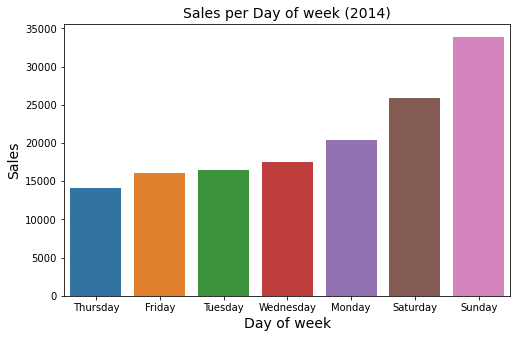

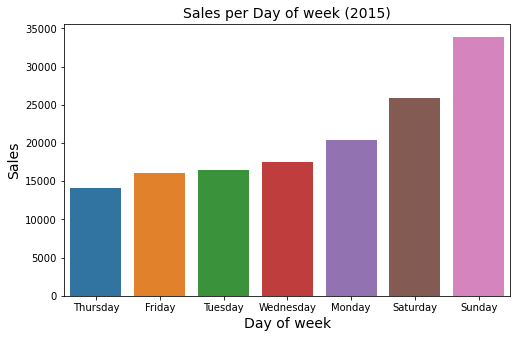

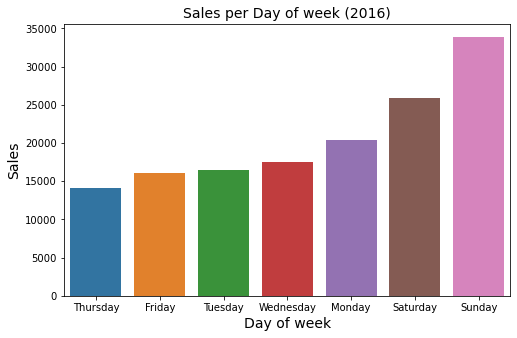

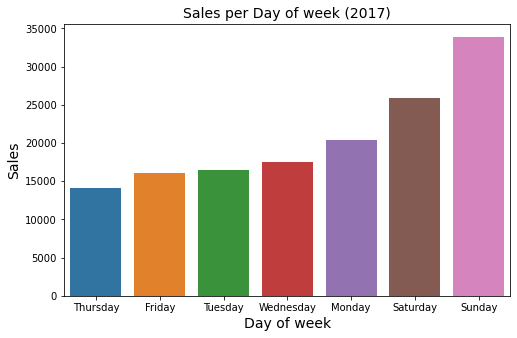

In [19]:
for year in df_train["date"].dt.year.unique():
    #Filtering data for specific year
    x = df_train[df_train["date"].dt.year == year]

    #Adding Day of Week as a Feature
    df_train['day_of_week'] = df_train['date'].dt.day_name()
    # Group By day_of_week and Sum of unit_sales for each day_of_week
    x = df_train.groupby(['day_of_week'], as_index=False).agg({'unit_sales':'sum'})

    #Sorting Dataframe by Week_day
    x = Sort_Dataframeby_Weekday(df=x,Weekdaycolumnname='day_of_week')

    #Plotting day_of_week Vs unit_sales
    plt.figure(figsize=(8,5))
    sns.barplot(x = x.day_of_week, y = 'unit_sales', data = x, order= x.sort_values("unit_sales").day_of_week)
    plt.title("Sales per Day of week ("+str(year)+")", fontsize= 14)
    plt.xlabel('Day of week', fontsize= 14)
    plt.ylabel('Sales', fontsize= 14)

    del x

#### Sales per Day of Week


* Sunday has the maximum sales followed bySaturday and Wednesday (i.e. Weekends seem to be prefered as compared to Weekdays to shop at this supermaket.)
* Thursday has the least sales. 
*   Day of Week can be used as a feature to predict sales

### Wage Payment Impact

In [20]:
df_train['date_only']  = df_train['date'].apply(lambda x: (str(x)[8:10]))
def date(df):
    if ((df=='15') | (df=='30')):
        return 1
    else:
        return 0
df_train['wages_paid']  = df_train['date_only'].apply(date)

In [21]:
# def day(df):
#     if ((df=='Wednesday') | (df=='Saturday')):
#         return 1
#     elif df=='Sunday':
#         return 2
#     else:
#         return 0
# df_train['week_day']  = df_train['day_of_week'].apply(day)

In [22]:
# def year(df):
#     if (df=='2016'):
#         return 1
#     else:
#         return 0
# df_train['year_']  = df_train['year'].apply(day)

In [23]:
# del df_train["day_of_week"]

In [24]:
df_train.head()

Unnamed: 0       date  store_nbr  item_nbr  onpromotion        family  \
3            3 2013-01-02         44    502331          0.0  BREAD/BAKERY   
10          10 2013-01-03         44    502331          0.0  BREAD/BAKERY   
17          17 2013-01-04         44    502331          0.0  BREAD/BAKERY   
24          24 2013-01-05         44    502331          0.0  BREAD/BAKERY   
31          31 2013-01-06         44    502331          0.0  BREAD/BAKERY   

    class  perishable  dcoilwtico  transactions  unit_sales  year day_of_week  \
3    2702           1      93.125        4820.0       163.0  2013   Wednesday   
10   2702           1      93.000        3618.0        87.0  2013    Thursday   
17   2702           1      93.125        4168.0       100.0  2013      Friday   
24   2702           1      93.125        4920.0       137.0  2013    Saturday   
31   2702           1      93.125        4924.0       203.0  2013      Sunday   

   date_only  wages_paid  
3         02           0  
10        03           0  
17        04           0  
24        05           0  
31        06           0

In [25]:
# df_train.to_csv("44_item")

In [26]:
#Pie plot of no. of items Vs perishable or not i.e. 0 or 1
x = go.Pie(
    labels = ['No Public Sector Wage Payment', 'Wage Payment'], 
    values = df_train.wages_paid.value_counts().values,
    marker=dict(colors=["#3498DB", "#F39C12"]),
    text=['No Public Sector Wage Payment', 'Wage Payment'],
    hoverinfo="label+value",
    domain = dict(x=[0, 0.48], y=[0.5, 1]),
    showlegend = False
)

item_pie_layout = dict(
    width=800, height=700,
    title="Percentage of Wage Payment Days "
)

x = go.Figure(data = x, layout=item_pie_layout)
py.iplot(x)

In [27]:
x = df_train.groupby(['wages_paid'], as_index=False).agg({'unit_sales':'sum', 'wages_paid':'count'}) 
x['unit_sales_normalized'] = x['unit_sales']/x['wages_paid']
x

unit_sales  wages_paid  unit_sales_normalized
0    135416.0        1573              86.087730
1      8876.0         106              83.735849

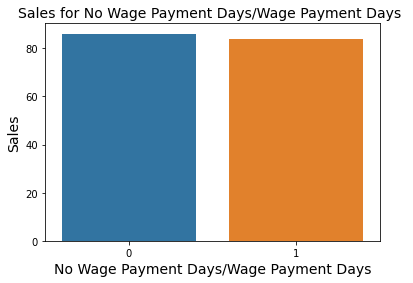

In [28]:
x = df_train.groupby(['wages_paid'], as_index=False).agg({'unit_sales':'sum', 'wages_paid':'count'}) 
x['unit_sales_normalized'] = x['unit_sales']/x['wages_paid']
#Plotting perishable or not  Vs unit_sales
fig, ax = plt.subplots()
ax = sns.barplot(x = x.index, y= 'unit_sales_normalized', data = x)
plt.ylabel('Sales', fontsize= 14)
plt.xlabel('No Wage Payment Days/Wage Payment Days', fontsize= 14)
plt.title('Sales for No Wage Payment Days/Wage Payment Days ',fontsize= 14)
plt.show()

* Sales are higher on other days as compared to the days on which wages are paid

#### No. of Items on promotion

In [29]:
#Pie plot showing information about promotion column
pie_perish_trace = go.Pie(
    labels = ['Not-on_Promotion','on_Promotion'], 
    values = df_train.onpromotion.value_counts().values,
    text=['Not-on_Promotion','on_Promotion'],
    hoverinfo="label+value",
    domain = dict(x=[0, 0.48], y=[0.5, 1]),
    showlegend = False
)

item_pie_layout = dict(
    width=800, height=700,
    title="Percentage of items on Promotion "
)

pie_perish_fig = go.Figure(data=pie_perish_trace, layout=item_pie_layout)
py.iplot(pie_perish_fig)

del pie_perish_trace,pie_perish_fig



* Small fraction of items are on promotion 
* Majority of items are not on promotion.






#### Sales for on promotion/not on promotion Items

In [30]:
df_train['onpromotion'] = df_train['onpromotion'].replace(True,1)
df_train['onpromotion'] = df_train['onpromotion'].replace(False,0)

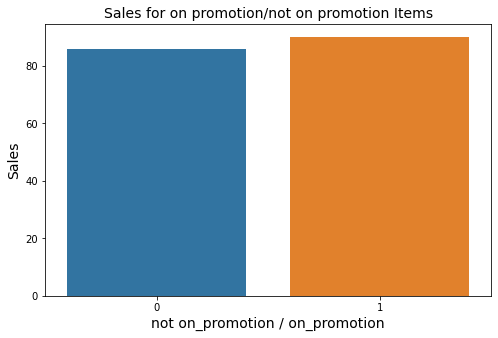

In [31]:
# Group By day_of_week and Sum of unit_sales for each day_of_week
x = df_train.groupby(['onpromotion'], as_index=False).agg({'unit_sales':'sum','store_nbr':'count'})
x['unit_sales_normalized'] = x['unit_sales']/x['store_nbr']


#Plotting day_of_week Vs unit_sales
plt.figure(figsize=(8,5))
sns.barplot(x= x.index, y= x.unit_sales_normalized, data = x, order= x.sort_values("unit_sales_normalized").index)
plt.title('Sales for on promotion/not on promotion Items', fontsize= 14)
plt.xticks((0,1))
plt.xlabel('not on_promotion / on_promotion', fontsize= 14)
plt.ylabel('Sales', fontsize= 14)

del x

* Sales for Items  Not on Promotion are higher on an average

#### No of Items per Item Family

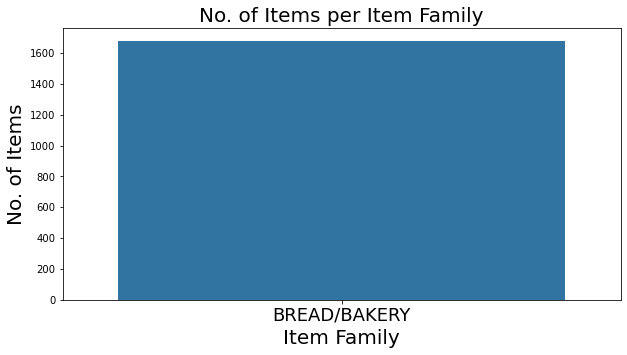

In [32]:
x=df_train.family.value_counts().to_frame()

#Plotting item family Vs no.of items
fig, ax = plt.subplots()
fig.set_size_inches(10, 5)
ax = sns.barplot(x = x.index, y= "family", data = x)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 0, fontsize = 18)
plt.ylabel('No. of Items', fontsize= 20)
plt.xlabel('Item Family', fontsize= 20)
plt.title('No. of Items per Item Family',fontsize= 20)
plt.show()


* Grocery I has the maximum no. of items followed by Beverages and Cleaning .
* Some of the Families such as Home Appliances, Baby Care, Books has almost no items.





#### Sales per Item Family

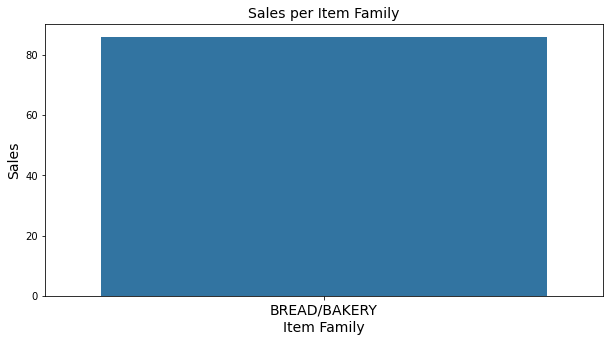

In [33]:
x = df_train.groupby(['family'], as_index=False).agg({'unit_sales':'sum', 'item_nbr': "count"}) 
x['unit_sales_normalized'] = x['unit_sales']/x['item_nbr']
#Plotting item family Vs unit_sales
fig, ax = plt.subplots()
fig.set_size_inches(10, 5)
ax = sns.barplot(x = x.family, y= 'unit_sales_normalized', data = x)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 0, fontsize = 14)
plt.ylabel('Sales', fontsize= 14)
plt.xlabel('Item Family', fontsize= 14)
plt.title('Sales per Item Family',fontsize= 14)
plt.show()

del x



*  produce is the best selling family 
*   Item family shows variation in sales number




#### No of Items per Item class

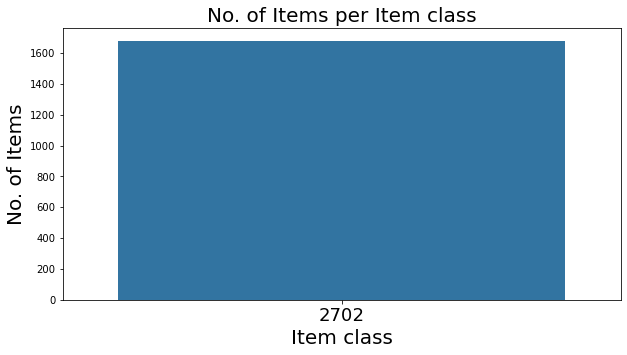

In [34]:
x=df_train["class"].value_counts().to_frame()

#Plotting item family Vs no.of items
fig, ax = plt.subplots()
fig.set_size_inches(10, 5)
ax = sns.barplot(x = x.index, y= "class", data = x)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 0, fontsize = 18)
plt.ylabel('No. of Items', fontsize= 20)
plt.xlabel('Item class', fontsize= 20)
plt.title('No. of Items per Item class',fontsize= 20)
plt.show()

#### Sales per Item class

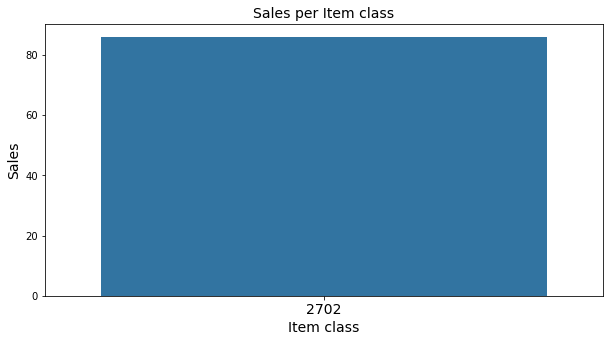

In [35]:
x = df_train.groupby(['class'], as_index=False).agg({'unit_sales':'sum', 'item_nbr': "count"}) 
x['unit_sales_normalized'] = x['unit_sales']/x['item_nbr']
#Plotting item family Vs unit_sales
fig, ax = plt.subplots()
fig.set_size_inches(10, 5)
ax = sns.barplot(x = x['class'], y= 'unit_sales_normalized', data = x)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 0, fontsize = 14)
plt.ylabel('Sales', fontsize= 14)
plt.xlabel('Item class', fontsize= 14)
plt.title('Sales per Item class',fontsize= 14)
plt.show()

del x

#### No. of Items Perishable/Non-Perishable

In [36]:
#Pie plot of no. of items Vs perishable or not i.e. 0 or 1
x = go.Pie(
    labels = ['non-perishable', 'perishable'], 
    values = df_train.perishable.value_counts().values,
    marker=dict(colors=["#3498DB", "#F39C12"]),
    text=['non-perishable','perishable'],
    hoverinfo="label+value",
    domain = dict(x=[0, 0.48], y=[0.5, 1]),
    showlegend = False
)

item_pie_layout = dict(
    width=800, height=700,
    title="Percentage of perishable items "
)

x = go.Figure(data=x, layout=item_pie_layout)
py.iplot(x)


*  We can see that more non-perishable item exists in the dataset.

* About 1/4 of all items are perishable. This  will have a  impact our prediction models, because good predictions of perishable items are rewarded with a bonus ( i.e Items marked as perishable have a score weight of 1.25; otherwise, the weight is 1.0)








#### Sales for Perishable/Non-Perishable Item


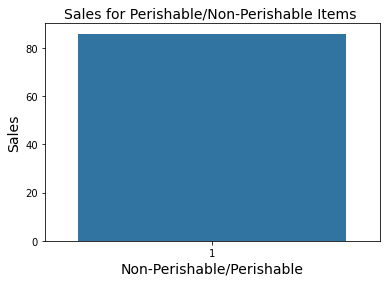

In [37]:
x = df_train.groupby(['perishable'], as_index=False).agg({'unit_sales':'sum', 'item_nbr':'count'}) 
x['unit_sales_normalized'] = x['unit_sales']/x['item_nbr']
#Plotting perishable or not  Vs unit_sales
fig, ax = plt.subplots()
ax = sns.barplot(x = x.perishable, y= 'unit_sales_normalized', data = x)
plt.ylabel('Sales', fontsize= 14)
plt.xlabel('Non-Perishable/Perishable', fontsize= 14)
plt.title('Sales for Perishable/Non-Perishable Items ',fontsize= 14)
plt.show()


*  <font color='red'> non perishable item


## <font color='salmon'>Oil Price and Unit Sales over Date


In [38]:
# #Filtering data only for year 2016
# df_oil_2016=df_oil[df_oil["date"].dt.year==2016]
# df_oil_2016

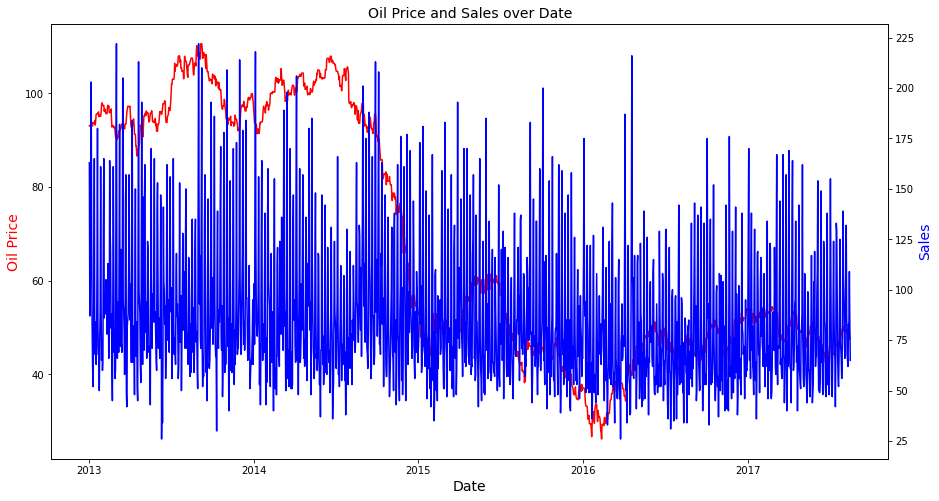

In [39]:
#Plotting date vs oil price(1st y axis) 
fig,ax = plt.subplots()
fig.set_size_inches(15, 8)
ax.plot(df_train["date"], df_train.dcoilwtico, color="red")

# set x-axis label
ax.set_xlabel("Date",fontsize=14)
# set y-axis label
ax.set_ylabel("Oil Price",color="red",fontsize=14)
ax.figsize=(50,11)
x = df_train.groupby("date").agg({"unit_sales":"sum"})
#Plotting date vs unit_sales(2nd y axis) 
ax2=ax.twinx()   # twin object for two different y-axis on the sample plot
ax2.plot(x.index, x["unit_sales"],color="blue")  # make a plot with different y-axis using second axis object
ax2.set_ylabel("Sales",color="blue",fontsize=14)
plt.title('Oil Price and Sales over Date',fontsize=14)
plt.show()


### <font color='salmon'> Correlation / Regression

#### <font color='navy'> Question  - Is there any statistically significant relation between  Oil price and Sales of the stores ?

* Null Hypothesis H0        = Oil price and Sales are independent from each other.
* Alternative Hypothesis HA = Oil price and Sales are not independent of each other. There is a relationship between them.


* Oil Price - Independent continuous variable
* Sales - Dependent continuous variable

##### We will do Simple Linear Regression now

In [40]:
x = df_train.groupby("date").agg({"unit_sales":"sum"})
train = pd.merge(x, df_train, on= "date")

In [41]:
lm0 = smf.ols(formula = 'unit_sales ~ dcoilwtico', data = df_train).fit()

In [42]:
#print the Result 
print(lm0.summary())

                            OLS Regression Results                            
Dep. Variable:             unit_sales   R-squared:                       0.033
Model:                            OLS   Adj. R-squared:                  0.033
Method:                 Least Squares   F-statistic:                     57.84
Date:                Sun, 22 Aug 2021   Prob (F-statistic):           4.72e-14
Time:                        11:13:11   Log-Likelihood:                -8275.4
No. Observations:                1679   AIC:                         1.655e+04
Df Residuals:                    1677   BIC:                         1.657e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     69.5074      2.310     30.092      0.0

<font color='red'>There is a  significant relationship between oil price and unit_sales as depicted by the p-value

## <font color='salmon'>Transactions and Unit Sales over Date

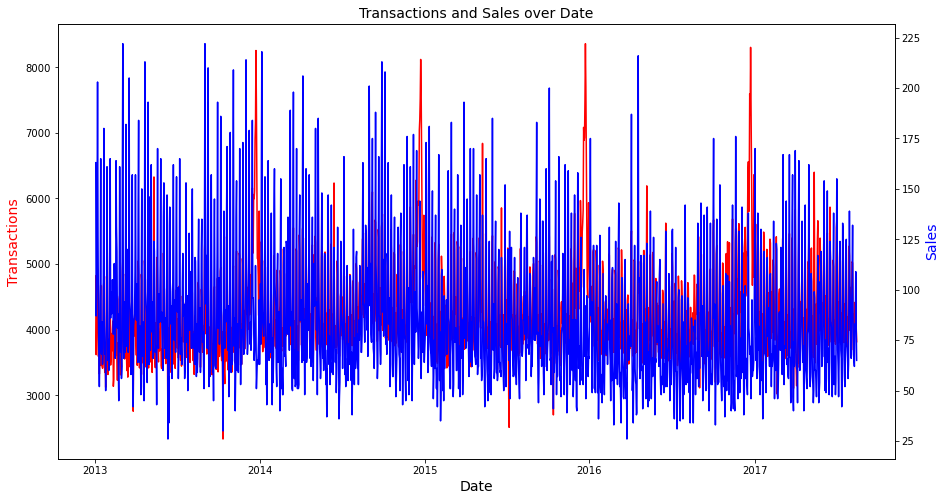

In [43]:
#Plotting date vs oil price(1st y axis) 
fig,ax = plt.subplots()
fig.set_size_inches(15, 8)
ax.plot(df_train["date"], df_train.transactions, color="red")

# set x-axis label
ax.set_xlabel("Date",fontsize=14)
# set y-axis label
ax.set_ylabel("Transactions",color="red",fontsize=14)
ax.figsize=(50,11)
x = df_train.groupby("date").agg({"unit_sales":"sum"})
#Plotting date vs unit_sales(2nd y axis) 
ax2=ax.twinx()   # twin object for two different y-axis on the sample plot
ax2.plot(x.index, x["unit_sales"],color="blue")  # make a plot with different y-axis using second axis object
ax2.set_ylabel("Sales",color="blue",fontsize=14)
plt.title('Transactions and Sales over Date',fontsize=14)
plt.show()

#### <font color='navy'> Question  - Is there any statistically significant relation between  transactions and Sales of the stores ?

In [44]:
x = df_train.groupby("date").agg({"unit_sales":"sum"})
lm0 = smf.ols(formula = 'unit_sales ~ transactions', data = df_train).fit()
#print the Result 
print(lm0.summary())

                            OLS Regression Results                            
Dep. Variable:             unit_sales   R-squared:                       0.309
Model:                            OLS   Adj. R-squared:                  0.309
Method:                 Least Squares   F-statistic:                     749.8
Date:                Sun, 22 Aug 2021   Prob (F-statistic):          9.19e-137
Time:                        11:13:11   Log-Likelihood:                -7993.6
No. Observations:                1679   AIC:                         1.599e+04
Df Residuals:                    1677   BIC:                         1.600e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      -26.5046      4.164     -6.365   

<font color='red'>Significant relationship between Transactions and unit_sales as depicted by the p-value

#### <font color='navy'> Question  - Is there any statistically significant relation between  wages paid and Sales of the stores ?

In [45]:
x = df_train.groupby(['wages_paid'], as_index=False).agg({'unit_sales':'sum', 'wages_paid':'count'}) 
x['unit_sales_normalized'] = x['unit_sales']/x['wages_paid']
x

unit_sales  wages_paid  unit_sales_normalized
0    135416.0        1573              86.087730
1      8876.0         106              83.735849

In [46]:
lm0 = smf.ols(formula = 'unit_sales ~ wages_paid', data = df_train).fit()

In [47]:
#print the Result 
print(lm0.summary())

                            OLS Regression Results                            
Dep. Variable:             unit_sales   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.4743
Date:                Sun, 22 Aug 2021   Prob (F-statistic):              0.491
Time:                        11:13:11   Log-Likelihood:                -8303.6
No. Observations:                1679   AIC:                         1.661e+04
Df Residuals:                    1677   BIC:                         1.662e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     86.0877      0.858    100.334      0.0

<font color='red'>There is a No significant relationship between wages paid and unit_sales as depicted by the p-value

#### <font color='navy'> Question  - Is there any statistically significant relation between  onpromotion and Sales of the stores ?

In [50]:
lm0 = smf.ols(formula = 'unit_sales ~ onpromotion', data = df_train).fit()
#print the Result 
print(lm0.summary())

                            OLS Regression Results                            
Dep. Variable:             unit_sales   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.3904
Date:                Sun, 22 Aug 2021   Prob (F-statistic):              0.532
Time:                        13:41:29   Log-Likelihood:                -8303.7
No. Observations:                1679   AIC:                         1.661e+04
Df Residuals:                    1677   BIC:                         1.662e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      85.8755      0.837    102.628      

<font color='red'>No significant relationship between onpromotion and unit_sales as depicted by the p-value

In [48]:
# x.to_csv("unit_sales_by_date")

In [49]:
# !jt -t chesterish